#### Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Read the dataset

In [2]:
df = pd.read_csv('Mobile_data.csv')
df.head()

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19,1
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7,2
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9,2
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,2
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15,1


In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None) 

#### Shape

In [4]:
df.shape
# rows =2000,cols=15

(2000, 15)

### Data Preprocessing

#### Handle null values

In [5]:
df.isnull().sum()

battery_power    0
clock_speed      0
fc               0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
price_range      0
dtype: int64

#### 2) Handling duplicates

In [6]:
df.duplicated().sum()

0

#### 3) Checking data types of columns

In [7]:
df.dtypes.value_counts()

int64      13
float64     2
dtype: int64

In [8]:
df.dtypes

battery_power      int64
clock_speed      float64
fc                 int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
price_range        int64
dtype: object

### Target Variable

In [9]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

### EDA

In [10]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

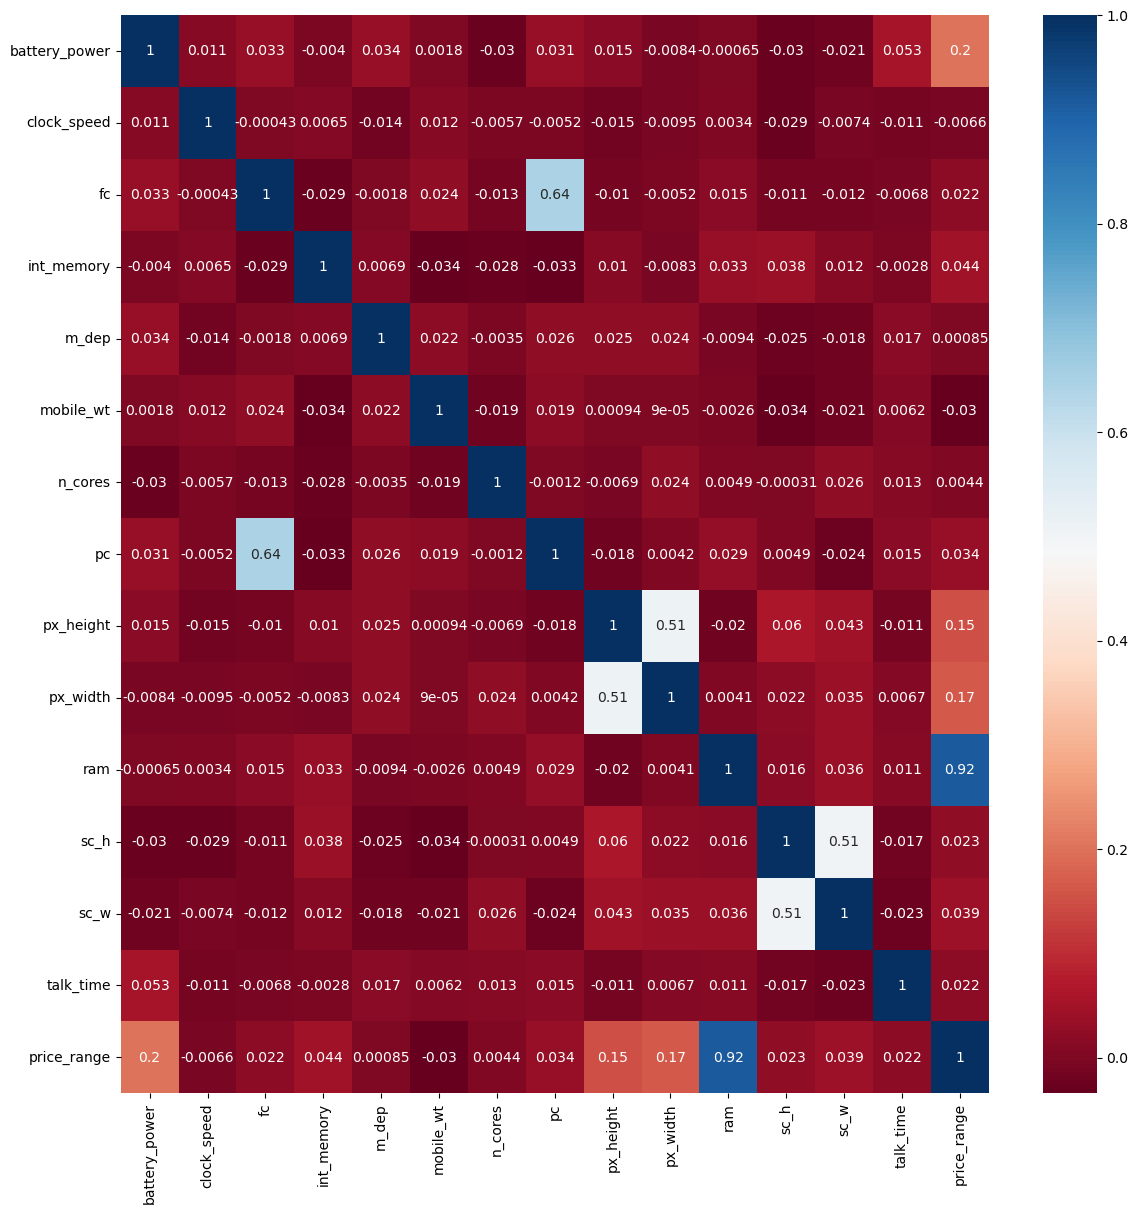

In [11]:
corr = df.corr()

plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

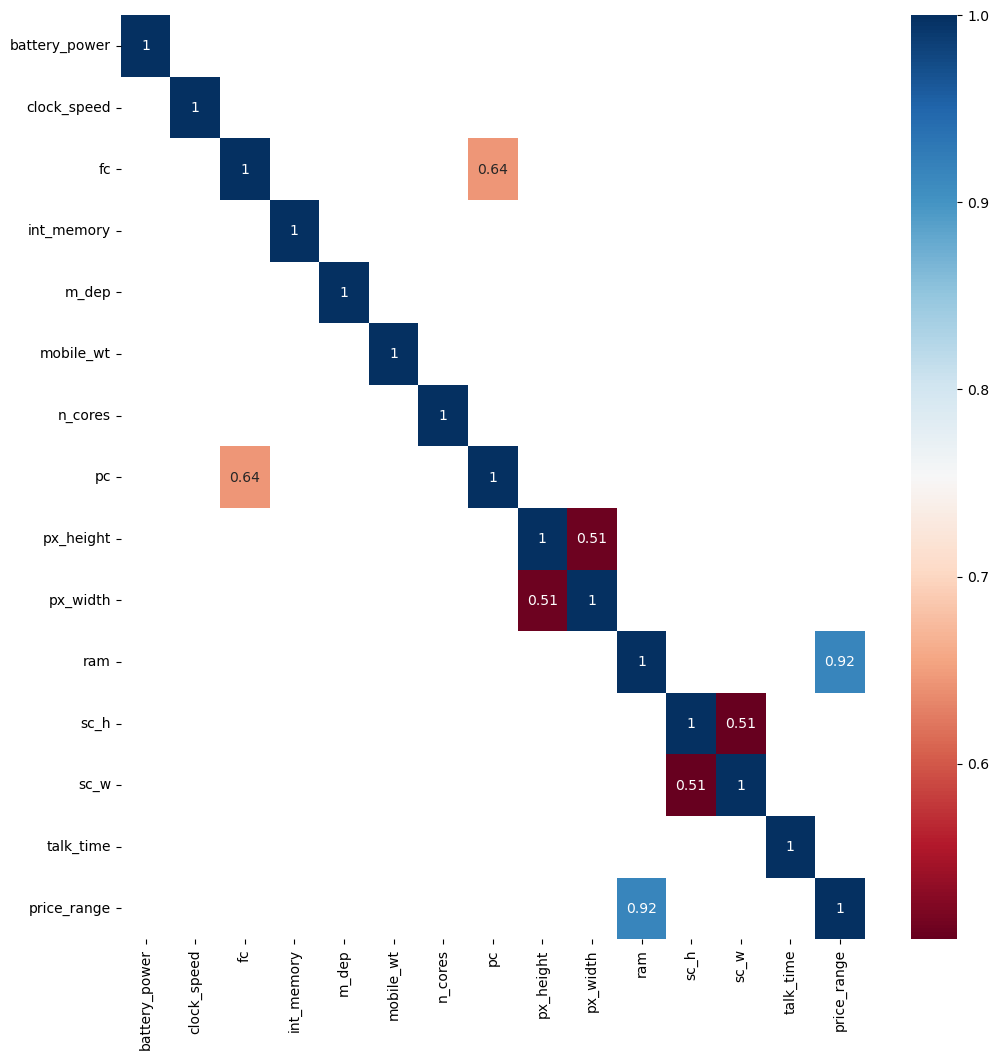

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(corr[abs(corr)>0.5],annot=True,cmap='RdBu')
plt.show()

#### Inference
1) pc and fc have correlation of 0.64<br>
2) px_height and px_width have correlation of 0.51.<br>
3) sc_w and sc_h have correlation of 0.51.<br>

In [13]:
for i in df.columns[:-1]:
    print(f'Feature: {i}')
    print(f'Number of categories: {df[i].nunique()}')
    print('*'*30)

Feature: battery_power
Number of categories: 1094
******************************
Feature: clock_speed
Number of categories: 26
******************************
Feature: fc
Number of categories: 20
******************************
Feature: int_memory
Number of categories: 63
******************************
Feature: m_dep
Number of categories: 10
******************************
Feature: mobile_wt
Number of categories: 121
******************************
Feature: n_cores
Number of categories: 8
******************************
Feature: pc
Number of categories: 21
******************************
Feature: px_height
Number of categories: 1137
******************************
Feature: px_width
Number of categories: 1109
******************************
Feature: ram
Number of categories: 1562
******************************
Feature: sc_h
Number of categories: 15
******************************
Feature: sc_w
Number of categories: 19
******************************
Feature: talk_time
Number of categories: 19
***

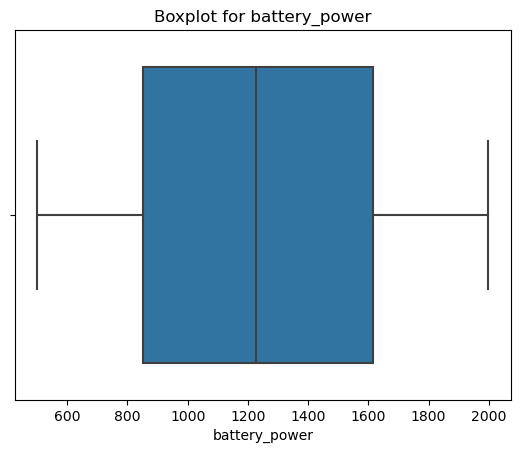

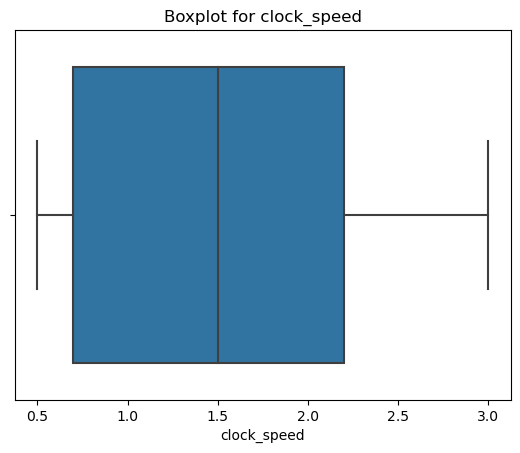

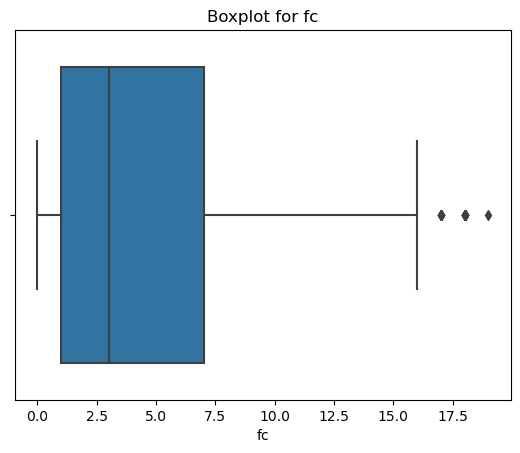

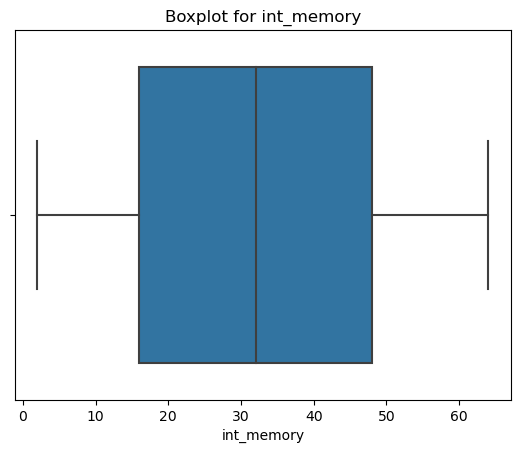

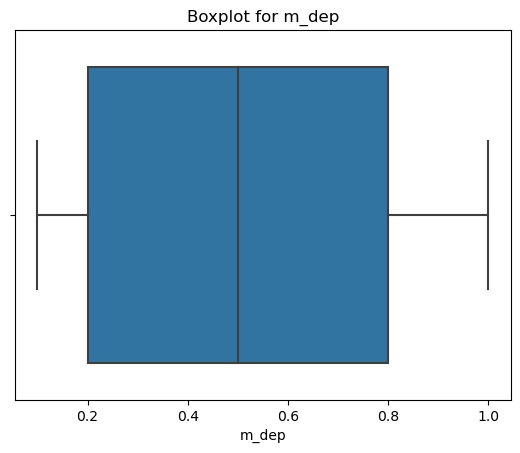

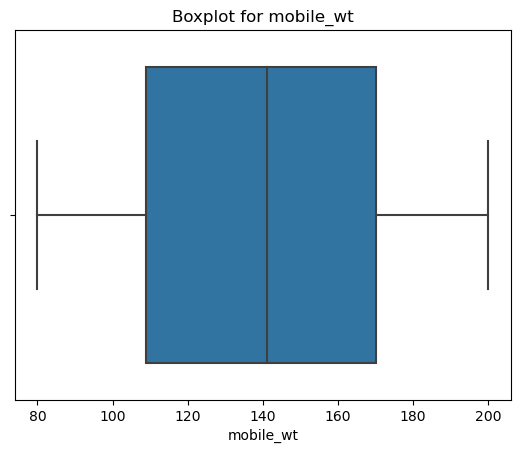

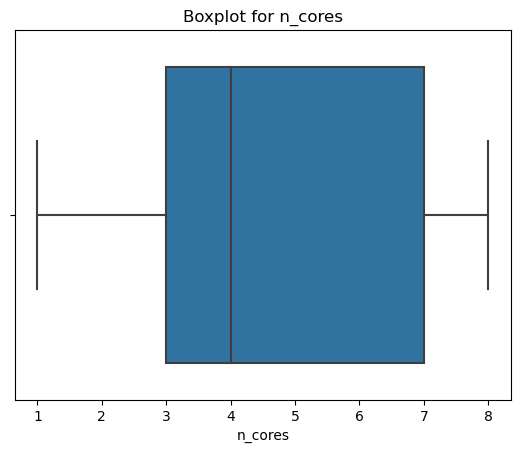

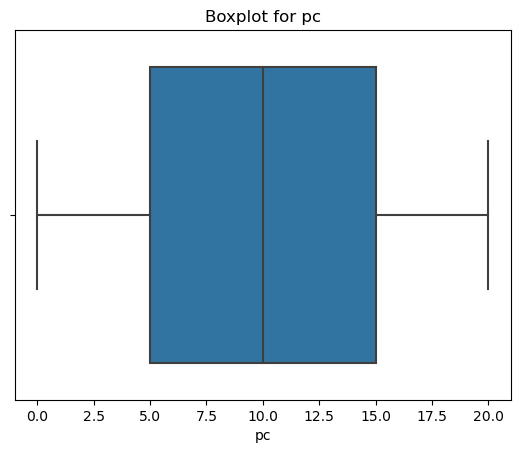

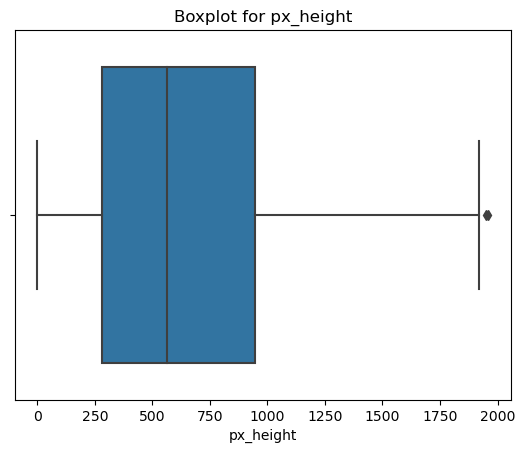

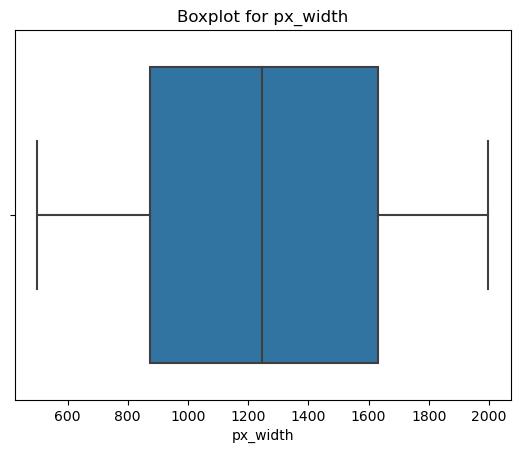

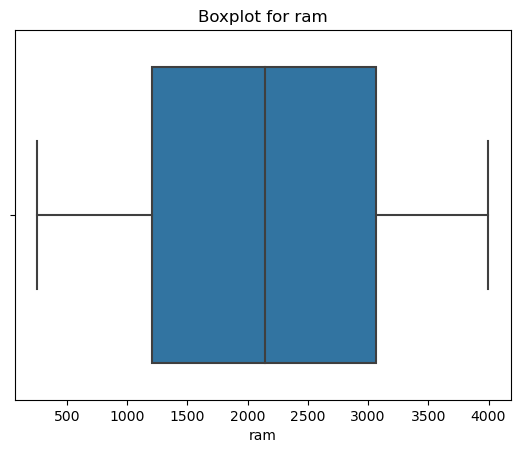

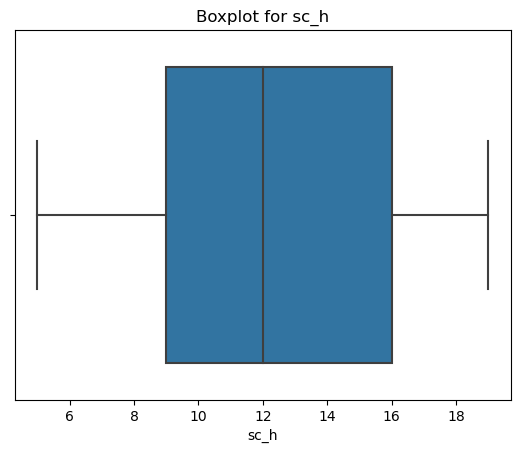

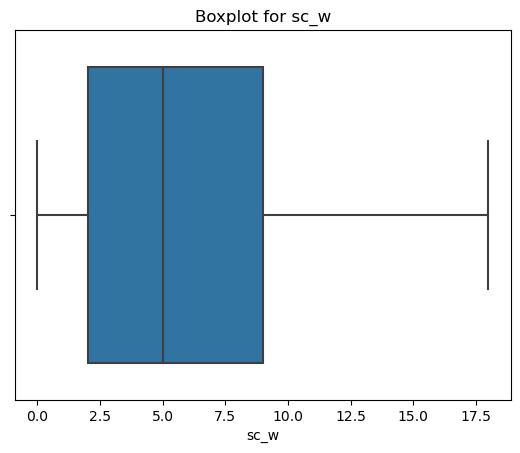

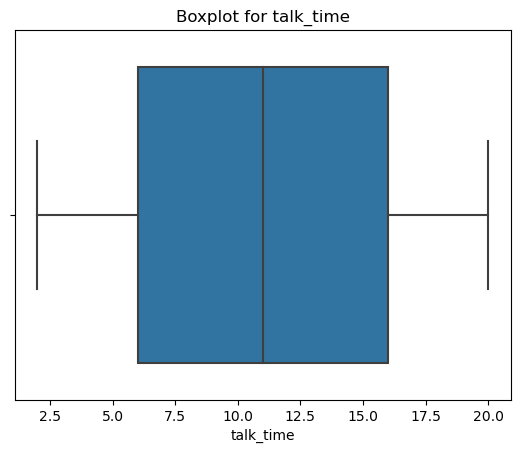

In [14]:
for i in df.columns[:-1]:
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot for {i}')
    plt.show()

In [15]:
df[df['fc']>16].shape

(18, 15)

In [16]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [17]:
res = df.groupby('price_range').agg(['min','max','mean','median','std','var']).T
res.head(30)

price_range                       0              1              2  \
battery_power min        503.000000     501.000000     501.000000   
              max       1994.000000    1996.000000    1998.000000   
              mean      1116.902000    1228.868000    1228.320000   
              median    1066.000000    1206.000000    1219.500000   
              std        410.801305     438.614528     452.863065   
              var     168757.711820  192382.703984  205084.955511   
clock_speed   min          0.500000       0.500000       0.500000   
              max          3.000000       3.000000       3.000000   
              mean         1.550200       1.488600       1.529800   
              median       1.550000       1.500000       1.500000   
              std          0.848941       0.814479       0.804404   
              var          0.720701       0.663377       0.647066   
fc            min          0.000000       0.000000       0.000000   
              max         19.000000      18.000000      18.000000   
              mean         4.084000       4.340000       4.498000   
              median       3.000000       3.000000       3.000000   
              std          4.183772       4.499432       4.347390   
              var         17.503952      20.244890      18.899796   
int_memory    min          2.000000       2.000000       2.000000   
              max         64.000000      64.000000      64.000000   
              mean        31.174000      32.116000      30.920000   
              median      30.000000      32.000000      30.000000   
              std         18.101023      18.000739      18.441958   
              var        327.647018     324.026597     340.105812   
m_dep         min          0.100000       0.100000       0.100000   
              max          1.000000       1.000000       1.000000   
              mean         0.490200       0.524000       0.490800   
              median       0.500000       0.500000       0.500000   
              std          0.288184       0.286895       0.286215   
              var          0.083050       0.082309       0.081919   

price_range                       3  
battery_power min        503.000000  
              max       1994.000000  
              mean      1379.984000  
              median    1449.500000  
              std        414.992261  
              var     172218.576898  
clock_speed   min          0.500000  
              max          3.000000  
              mean         1.520400  
              median       1.500000  
              std          0.796450  
              var          0.634333  
fc            min          0.000000  
              max         18.000000  
              mean         4.316000  
              median       3.000000  
              std          4.332399  
              var         18.769683  
int_memory    min          2.000000  
              max         64.000000  
              mean        33.976000  
              median      34.500000  
              std         17.930377  
              var        321.498421  
m_dep         min          0.100000  
              max          1.000000  
              mean         0.502000  
              median       0.500000  
              std          0.291901  
              var          0.085206

In [18]:
res.tail(54)

price_range                   0              1              2              3
mobile_wt min         80.000000      80.000000      80.000000      80.000000
          max        200.000000     200.000000     200.000000     200.000000
          mean       140.552000     140.510000     143.614000     136.320000
          median     142.000000     141.000000     145.000000     134.000000
          std         36.378319      35.678956      34.320326      34.911994
          var       1323.382060    1272.987876    1177.884774    1218.847295
n_cores   min          1.000000       1.000000       1.000000       1.000000
          max          8.000000       8.000000       8.000000       8.000000
          mean         4.600000       4.298000       4.682000       4.502000
          median       5.000000       4.000000       5.000000       5.000000
          std          2.268544       2.311684       2.262546       2.297074
          var          5.146293       5.343884       5.119114       5.276549
pc        min          0.000000       0.000000       0.000000       0.000000
          max         20.000000      20.000000      20.000000      20.000000
          mean         9.574000       9.924000      10.018000      10.150000
          median       9.500000      10.000000      10.000000      10.000000
          std          6.095805       6.124806       5.952861       6.085521
          var         37.158842      37.513251      35.436549      37.033567
px_height min          1.000000       0.000000      10.000000       0.000000
          max       1878.000000    1914.000000    1960.000000    1949.000000
          mean       536.408000     666.892000     632.284000     744.848000
          median     465.500000     606.000000     538.500000     674.000000
          std        372.824164     441.351209     445.789232     483.720179
          var     138997.857251  194790.890116  198728.039423  233985.211319
px_width  min        500.000000     500.000000     508.000000     501.000000
          max       1989.000000    1998.000000    1997.000000    1995.000000
          mean      1150.270000    1251.908000    1234.046000    1369.838000
          median    1132.500000    1223.000000    1221.500000    1415.500000
          std        413.001780     433.564352     427.757151     426.823571
          var     170570.470040  187978.047631  182976.180244  182178.360477
ram       min        256.000000     387.000000    1185.000000    2259.000000
          max       1974.000000    2811.000000    3916.000000    3998.000000
          mean       785.314000    1679.490000    2582.816000    3449.232000
          median     719.500000    1686.500000    2577.000000    3509.500000
          std        362.755397     465.850159     496.211735     393.019923
          var     131591.478361  217016.370641  246226.086317  154464.659495
sc_h      min          5.000000       5.000000       5.000000       5.000000
          max         19.000000      19.000000      19.000000      19.000000
          mean        12.324000      12.212000      12.010000      12.680000
          median      12.000000      12.000000      12.000000      13.000000
          std          4.206949       4.226913       4.234355       4.168976
          var         17.698421      17.866790      17.929760      17.380361
sc_w      min          0.000000       0.000000       0.000000       0.000000
          max         18.000000      18.000000      17.000000      18.000000
          mean         5.682000       5.544000       5.714000       6.128000
          median       5.000000       5.000000       5.000000       5.000000
          std          4.174173       4.238868       4.265747       4.716790
          var         17.423723      17.968000      18.196597      22.248112
talk_time min          2.000000       2.000000       2.000000       2.000000
          max         20.000000      20.000000      20.000000      20.000000
          mean        10.612000      11.362000      10.972000      11.098

### Outlier Treatment

In [19]:
df.describe(percentiles=[0.95,0.97,0.98,0.99]).T

,count,mean,std,min,50%,95%,97%,98%,99%,max
battery_power,2000.0,1238.51850,439.418206,501.0,1226.0,1930.15,1961.06,1974.00,1987.00,1998.0
clock_speed,2000.0,1.52225,0.816004,0.5,1.5,2.80,2.90,2.90,3.00,3.0
fc,2000.0,4.30950,4.341444,0.0,3.0,13.00,15.00,16.00,16.00,19.0
int_memory,2000.0,32.04650,18.145715,2.0,32.0,61.00,63.00,63.00,64.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.5,1.00,1.00,1.00,1.00,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,141.0,196.00,198.00,199.00,199.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,4.0,8.00,8.00,8.00,8.00,8.0
pc,2000.0,9.91650,6.064315,0.0,10.0,20.00,20.00,20.00,20.00,20.0
px_height,2000.0,645.10800,443.780811,0.0,564.0,1485.05,1618.03,1698.00,1791.01,1960.0
px_width,2000.0,1251.51550,432.199447,500.0,1247.0,1929.05,1963.00,1974.00,1987.00,1998.0


#### Inference
1) Min Screen Width is 0. It needs to be treated.

In [20]:
df1 = df.copy()

In [21]:
df.shape

(2000, 15)

In [22]:
print(df[df['sc_w']==0].shape)
print(df[df['px_height']==0].shape)

(180, 15)
(2, 15)


In [23]:
print(df['sc_w'].mean(),df['sc_w'].median())
print(df['px_height'].mean(),df['px_height'].median())

5.767 5.0
645.108 564.0


In [24]:
df['sc_w'] = np.where(df['sc_w']==0,df['sc_w'].median(),df['sc_w'])
df['px_height'] = np.where(df['px_height']==0,df['px_height'].median(),df['px_height'])

In [25]:
print(df[df['sc_w']==0].shape)
print(df[df['px_height']==0].shape)

(0, 15)
(0, 15)


#### Treating Outliers

In [26]:
df[df['fc']>16].shape

(18, 15)

In [27]:
df['fc'] = np.where(df['fc']>16,16,df['fc'])

In [28]:
df[df['fc']>16].shape

(0, 15)

In [29]:
# def upper_outlier_treatment(x):
#     x = x.clip(upper=x.quantile(0.98))
#     return x
    
    

#### Select x and y

In [30]:
x = df.drop('price_range',axis=1)
y = df['price_range']
print(x.shape)
print(y.shape)

(2000, 14)
(2000,)


#### Splitting data into train and test

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1400, 14)
(600, 14)
(1400,)
(600,)


In [33]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [34]:
def eval_model(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    print('Training score',model.score(x_train,y_train))
    print('Testing score',model.score(x_test,y_test))
    ypred = model.predict(x_test)
    print('Predictions',ypred)
    cm = confusion_matrix(y_test,ypred)
    print(cm)
    print(classification_report(y_test,ypred))

### KNN 

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn1 = KNeighborsClassifier(n_neighbors=11)
eval_model(knn1,x_train,x_test,y_train,y_test)

Training score 0.9521428571428572
Testing score 0.9316666666666666
Predictions [0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 2 1 3 1 3 1 0 0 0 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 1 2 2 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 1 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 1 

### Scaling 

z = (x - mean)/std
<pre>
where
z = scaled data point
x = original data point
mean = mean of column
std = std of column</pre>


Mean becomes 0 and Std Dev becomes 1 => Stanard Normal dist

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
sc = StandardScaler()
# sc.fit(x_train)

x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)

(1400, 14)
(600, 14)


In [39]:
knn1_sc = KNeighborsClassifier(n_neighbors=11)
eval_model(knn1_sc,x_train_sc,x_test_sc,y_train,y_test)

Training score 0.74
Testing score 0.6416666666666667
Predictions [0 1 1 3 2 2 2 0 3 1 0 0 3 3 2 1 2 3 0 0 0 0 0 3 0 1 3 2 2 0 0 0 3 0 2 1 2
 0 3 0 2 2 2 0 2 1 1 0 3 1 3 1 1 0 1 1 0 3 0 1 1 3 2 2 0 1 3 3 2 2 2 2 0 1
 2 0 0 3 2 2 3 1 0 1 1 2 0 2 3 0 3 3 1 1 3 1 2 3 2 1 0 0 1 0 0 3 2 0 1 1 0
 0 2 1 3 2 2 2 0 2 1 2 3 1 3 1 0 2 1 3 3 0 2 2 0 2 1 0 1 2 1 1 2 2 0 0 1 0
 1 2 3 2 1 0 2 2 0 0 0 0 2 3 3 2 2 1 0 2 2 2 3 1 1 0 3 1 1 2 1 1 0 1 0 0 3
 3 0 2 0 0 0 1 0 3 3 2 0 1 2 1 1 2 2 3 3 3 2 2 0 0 0 1 0 0 3 1 1 2 2 1 2 1
 3 0 1 2 2 3 1 0 2 0 2 3 2 1 0 3 3 0 1 3 2 3 0 3 1 3 3 2 1 1 0 3 3 1 3 2 2
 2 3 0 1 2 2 3 2 1 1 3 1 1 2 0 0 1 0 1 3 2 3 0 0 3 1 3 0 0 2 0 1 1 3 3 2 1
 1 0 1 3 3 0 1 1 2 0 2 2 1 3 3 3 2 1 2 1 1 2 0 0 1 3 3 3 1 0 2 1 2 2 2 0 2
 3 2 1 2 0 0 2 1 3 3 0 1 3 1 1 1 3 1 0 1 3 2 1 2 0 0 1 0 1 1 2 2 3 0 2 3 2
 3 3 3 1 3 1 0 3 2 2 3 0 1 3 1 3 3 3 0 0 1 3 1 0 2 3 1 1 1 1 1 2 0 2 1 2 0
 1 2 0 1 0 0 0 2 3 3 2 1 0 1 1 0 3 0 0 1 3 0 2 1 0 1 1 3 0 2 0 0 0 2 3 0 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 1 1 3 2 

### Finding Optimal Number of Neighbors

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
neighbors = list(range(3,51,2)) 
knn_acc = []
for i in neighbors:          # i = 3,5...49
    m = KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    ypred = m.predict(x_test)
    knn_acc.append(accuracy_score(y_test,ypred))

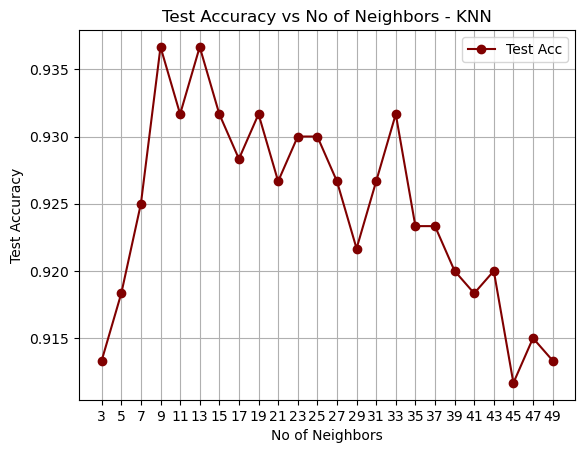

In [42]:
plt.plot(neighbors,knn_acc,color='maroon',label='Test Acc',marker='o')
plt.title('Test Accuracy vs No of Neighbors - KNN')
plt.xlabel('No of Neighbors')
plt.ylabel('Test Accuracy')
plt.xticks(neighbors)
plt.legend()
plt.grid()
plt.show()

#### Inference
1) Optimal number of neighbors = 9 or 13

In [43]:
knn2 = KNeighborsClassifier(n_neighbors=13)
eval_model(knn2,x_train,x_test,y_train,y_test)

Training score 0.945
Testing score 0.9366666666666666
Predictions [0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 2 1 3 1 3 1 0 0 0 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1

### Cross Validation

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:
model = KNeighborsClassifier(n_neighbors=13)

score = cross_val_score(model,x,y,cv=10,scoring='accuracy')
print(score)
print(score.mean())

[0.92  0.945 0.93  0.945 0.945 0.94  0.93  0.925 0.915 0.915]
0.9309999999999998


### RF for feature Selection

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
rf_base = RandomForestClassifier(random_state=0)
rf_base.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [48]:
fimp = pd.DataFrame({'Col':x_train.columns,'Imp':rf_base.feature_importances_})
fimp = fimp.sort_values('Imp',ascending=False)
fimp

,Col,Imp
10,ram,0.509963
0,battery_power,0.082050
8,px_height,0.058658
9,px_width,0.058002
3,int_memory,0.039755
5,mobile_wt,0.039415
1,clock_speed,0.028879
13,talk_time,0.028682
7,pc,0.028079
11,sc_h,0.027277


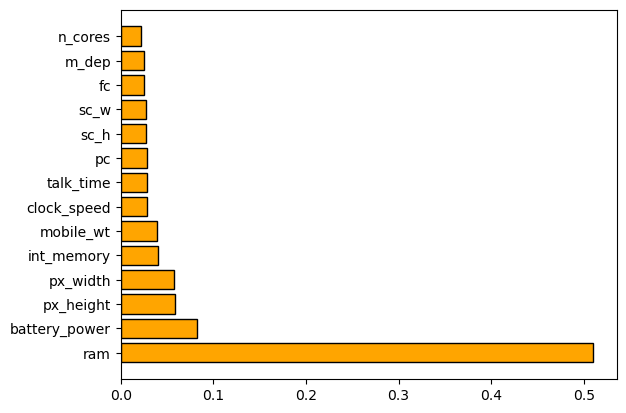

In [49]:
plt.barh(fimp['Col'],fimp['Imp'],color='orange',edgecolor='black')
plt.show()

#### Feature Selection excluding RAM

In [50]:
fimp1 = fimp.iloc[1:,:]
mean_fimp = fimp1['Imp'].mean()
print(mean_fimp)

0.03769517348631444


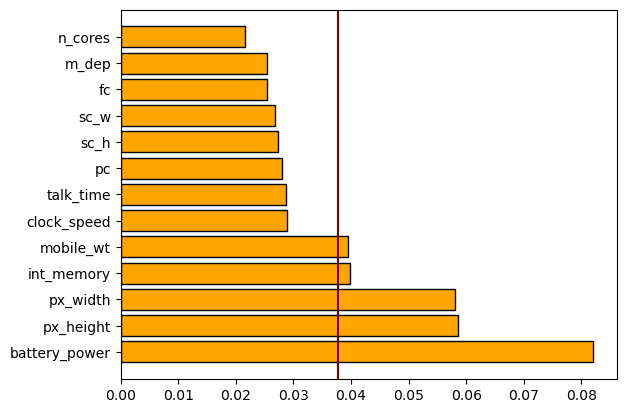

In [51]:
plt.barh(fimp1['Col'],fimp1['Imp'],color='orange',edgecolor='black')
plt.axvline(mean_fimp,color='maroon')
plt.show()

In [52]:
df.columns

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time', 'price_range'],
      dtype='object')

In [53]:
fimp1_col = fimp1['Col'][fimp1['Imp']>fimp1['Imp'].mean()].values
fimp1_col

array(['battery_power', 'px_height', 'px_width', 'int_memory',
       'mobile_wt'], dtype=object)

### Model - 3
With Feature Selection

In [54]:
x3 = df[['ram','battery_power', 'px_height', 'px_width', 'mobile_wt','int_memory']]
y3 = df['price_range']
print(x3.shape)
print(y3.shape)

(2000, 6)
(2000,)


#### Splitting into train and test data

In [55]:
from sklearn.model_selection import train_test_split
x_train3, x_test3, y_train3, y_test3 = train_test_split(x3,y3,test_size=0.30,random_state=42)
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(1400, 6)
(600, 6)
(1400,)
(600,)


In [56]:
knn3 = KNeighborsClassifier(n_neighbors=13)
eval_model(knn3,x_train3,x_test3,y_train3,y_test3)

Training score 0.945
Testing score 0.9366666666666666
Predictions [0 2 1 3 1 1 2 0 3 1 0 1 2 3 2 2 3 3 1 0 0 1 1 2 0 1 3 2 2 0 0 0 3 0 1 1 2
 0 3 0 2 3 2 0 3 2 2 1 3 1 3 1 0 0 0 1 1 3 0 0 1 3 3 1 0 0 3 3 1 2 2 2 0 1
 2 0 0 3 2 1 3 2 1 0 1 3 1 3 3 0 3 3 2 1 3 2 2 3 1 1 0 0 1 0 0 3 2 0 1 1 0
 0 3 1 2 2 3 2 0 2 1 3 2 1 3 3 0 2 0 2 3 0 2 2 0 3 1 0 0 2 2 1 2 2 0 0 0 1
 1 2 3 1 1 0 2 2 0 1 0 2 2 3 3 2 1 0 1 2 2 3 3 0 1 0 3 1 1 2 1 0 0 0 0 0 3
 2 0 3 0 0 0 0 1 3 3 1 0 1 1 1 1 2 2 3 3 3 1 2 0 0 0 2 1 1 3 1 0 2 1 1 3 2
 3 0 0 2 1 3 0 1 2 0 2 3 2 0 1 3 3 0 1 3 2 3 0 3 1 2 3 3 2 1 1 3 3 1 3 3 3
 3 3 0 2 2 2 1 3 0 1 3 2 2 2 1 0 2 0 3 3 1 3 1 0 3 1 2 0 0 3 0 1 2 3 3 3 1
 1 0 1 3 3 0 1 2 2 0 3 3 2 3 2 3 2 0 2 1 1 1 0 0 0 3 2 3 1 0 1 0 1 2 3 0 3
 3 2 1 2 0 0 2 1 3 2 0 1 1 1 0 1 3 2 0 0 3 3 0 3 0 0 2 0 1 2 2 2 3 0 3 2 2
 3 3 3 2 1 1 0 3 1 3 3 0 2 3 2 3 3 3 0 0 2 3 0 0 2 3 2 1 1 2 1 2 1 3 1 2 0
 0 1 0 1 0 1 0 2 2 3 2 1 1 2 1 0 3 1 0 0 3 0 1 0 0 1 3 3 0 2 0 1 1 3 3 1 2
 0 2 0 0 3 3 0 2 2 1 3 1 2 0 1 3 1

In [57]:
x_train3.head()

,ram,battery_power,px_height,px_width,mobile_wt,int_memory
836,3654,902,364.0,1360,122,63
575,2885,1197,214.0,1710,129,20
557,2912,1519,168.0,1239,200,32
1235,571,1971,485.0,922,186,40
1360,751,882,248.0,884,151,28


#### Generate Predictions on Test data

In [58]:
ypred_test = knn3.predict([[2900,1950,480,900,200,40]])
print(ypred_test)
print(ypred_test[0])

[3]
3
